## Fuzzy C-Means Clustering

In [19]:
import numpy as np
import pandas as pd
import math
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

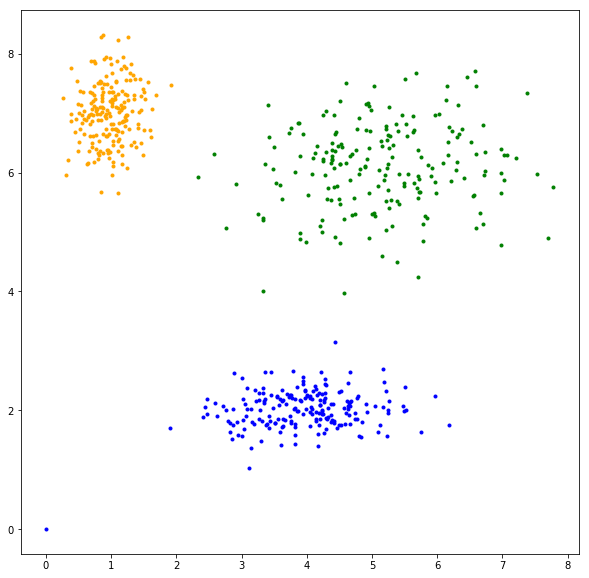

In [61]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data

fig0, ax0 = plt.subplots(figsize=(10,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color=colors[label])


In [65]:
ypts.shape

(601,)

In [71]:
data = np.zeros((xpts.shape[0],2))
for i in range(xpts.shape[0]):
    data[i] = (xpts[i],ypts[i])

In [74]:
data.shape[1]

2

In [76]:
df3 = pd.DataFrame(data,columns=['X','Y'])

In [78]:
df3.shape

(601, 2)

In [104]:
(df3.iloc[1] - df3.iloc[2]).values

array([ 0.50798276, -0.06089915])

In [83]:
df3.head()

,X,Y
0,0.000000,0.000000
1,4.397371,2.107336
2,3.889389,2.168235
3,4.518151,2.324915
4,5.218424,2.316141


In [86]:
centres = df3.head(3)

In [87]:
centres

,X,Y
0,0.000000,0.000000
1,4.397371,2.107336
2,3.889389,2.168235


In [130]:
def dist_vect(v1, v2):
    return ((v1 - v2) ** 2).sum()

In [98]:
def dist_vect_df(df, series):
    return df.apply(lambda x: dist_vect(x, series), axis=1)

In [100]:
dist_vect_df(centres,df3.iloc[1])

0    23.777740
1     0.000000
2     0.261755
dtype: float64

In [105]:
def distance(centres, data):
    distances = np.zeros((data.shape[0],centres.shape[0]))
    for i in range(data.shape[0]):
            distances[i] = dist_vect_df(centres,data.iloc[i])
    return distances
                

In [128]:
def membership_value(distances):
    u = np.zeros((distances.shape[1],distances.shape[0]))
    for r in range(distances.shape[1]):
        for i in range(distances.shape[0]):
            if distances[i][r] == 0:
                u[r][i] = 1
            else:
                s = np.sum(distances[i])
                dist = distances[i][r]
                frac = distances[i][r]/s
                u[r][i] = 1/frac
    return u     

In [129]:
membership_value(d)

array([[ 1.        ,  1.01100841,  1.0132009 , ...,  1.56063366,
         1.57068929,  1.6364666 ],
       [ 1.83391389,  1.        , 76.75241433, ...,  5.71600415,
         5.46131003,  5.23725782],
       [ 2.19916459, 91.83961258,  1.        , ...,  5.42631151,
         5.54844757,  5.05081826]])

In [60]:
def centroids(data,u):
    m = 2
    c = np.empty((u.shape[0]))
    for r in range(c.shape[0]):
        s = 0
        d = 0
        for i in range(len(data)):
            s += np.power(u[r][i],2)*data[i]
            d += np.power(u[r][i],2)
        c[r] = s/d*1.0
    return c